# Packages

In [151]:
#main packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

# Dataset

In [104]:
df = pd.read_json('../result.json')

In [105]:
df = df.loc[df.request_time.apply(lambda x: x.isnumeric())]
df.request_time = df.request_time.astype('int64')

### Preview data

In [93]:
df.head()

datetime  \
0 2021-05-12 05:06:00+04:30   
1 2021-05-12 05:06:00+04:30   
2 2021-05-12 05:06:00+04:30   
3 2021-05-12 05:06:00+04:30   
4 2021-05-12 05:06:00+04:30   

                                     http_user_agent               ip  \
0                              [Googlebot-Image/1.0]  207.213.193.143   
1                              [Googlebot-Image/1.0]  207.213.193.143   
2  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   
3  [[Linux, Android 6.0, CAM-L21], [KHTML, like G...    35.108.208.99   
4  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   

   status_code  request_length  request_time http_method  \
0          304               0            32         Get   
1          304               0             4         Get   
2          200           52567            32         Get   
3          200           23531            20         Get   
4          200            4680             8         Get   

                                url  
0          /cdn/profiles/1026106239  
1                  images/badge.png  
2                  /pages/630180847  
3              images/fav_icon2.ico  
4  images/sanjagh_logo_purpule5.png

In [6]:
df.describe()

status_code  request_length
count  1.260035e+06    1.260035e+06
mean   2.313682e+02    4.580962e+04
std    5.804793e+01    3.350437e+05
min    1.010000e+02    0.000000e+00
25%    2.000000e+02    0.000000e+00
50%    2.000000e+02    1.201000e+03
75%    3.040000e+02    2.650500e+04
max    5.030000e+02    1.022335e+08

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260035 entries, 0 to 1260034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   datetime         1260035 non-null  datetime64[ns, pytz.FixedOffset(270)]
 1   http_user_agent  1260035 non-null  object                               
 2   ip               1260035 non-null  object                               
 3   status_code      1260035 non-null  int64                                
 4   request_length   1260035 non-null  int64                                
 5   request_time     1260035 non-null  object                               
 6   http_method      1260035 non-null  object                               
 7   url              1260035 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), int64(2), object(5)
memory usage: 76.9+ MB


# Visualize

In [ ]:
df.head()

datetime  \
0 2021-05-12 05:06:00+04:30   
1 2021-05-12 05:06:00+04:30   
2 2021-05-12 05:06:00+04:30   
3 2021-05-12 05:06:00+04:30   
4 2021-05-12 05:06:00+04:30   

                                     http_user_agent               ip  \
0                              [Googlebot-Image/1.0]  207.213.193.143   
1                              [Googlebot-Image/1.0]  207.213.193.143   
2  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   
3  [[Linux, Android 6.0, CAM-L21], [KHTML, like G...    35.108.208.99   
4  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   

   status_code  request_length  request_time http_method  \
0          304               0            32         Get   
1          304               0             4         Get   
2          200           52567            32         Get   
3          200           23531            20         Get   
4          200            4680             8         Get   

                                url  
0          /cdn/profiles/1026106239  
1                  images/badge.png  
2                  /pages/630180847  
3              images/fav_icon2.ico  
4  images/sanjagh_logo_purpule5.png

### Status Code

In [47]:
df.status_code.value_counts()

200    765525
304    400543
101     61407
301     19725
307      7704
404      2004
499      1122
400       652
405       616
401       599
206        96
413        17
403        13
503         5
500         3
408         3
308         1
Name: status_code, dtype: int64

In [64]:
status_counts = np.zeros(5)

In [65]:
for i in range(df.status_code.nunique()):
    status_counts[int(np.floor(df.status_code.value_counts().index[i] / 100) - 1)] += df.status_code.value_counts().values[i]

In [75]:
pd.plotting.deregister_matplotlib_converters()

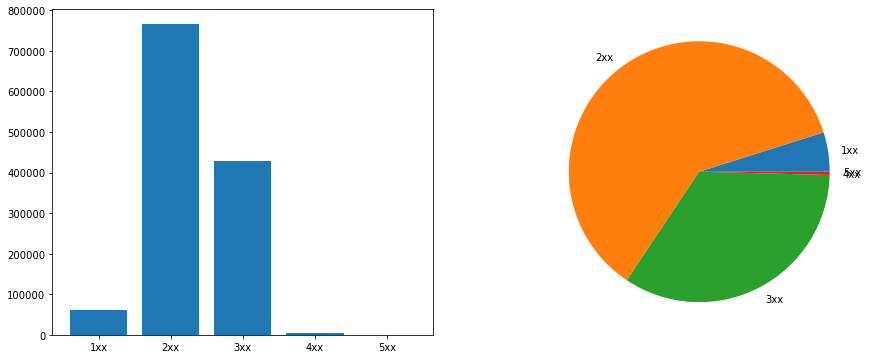

In [80]:
status_labels = ['1xx','2xx','3xx','4xx','5xx']
f, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].bar(status_labels, status_counts)
_ = axes[1].pie(status_counts, labels=status_labels)

### Request Lenght

In [ ]:
df.request_length.describe()

count    1.240227e+06
mean     4.648727e+04
std      3.376622e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.201000e+03
75%      2.741100e+04
max      1.022335e+08
Name: request_length, dtype: float64

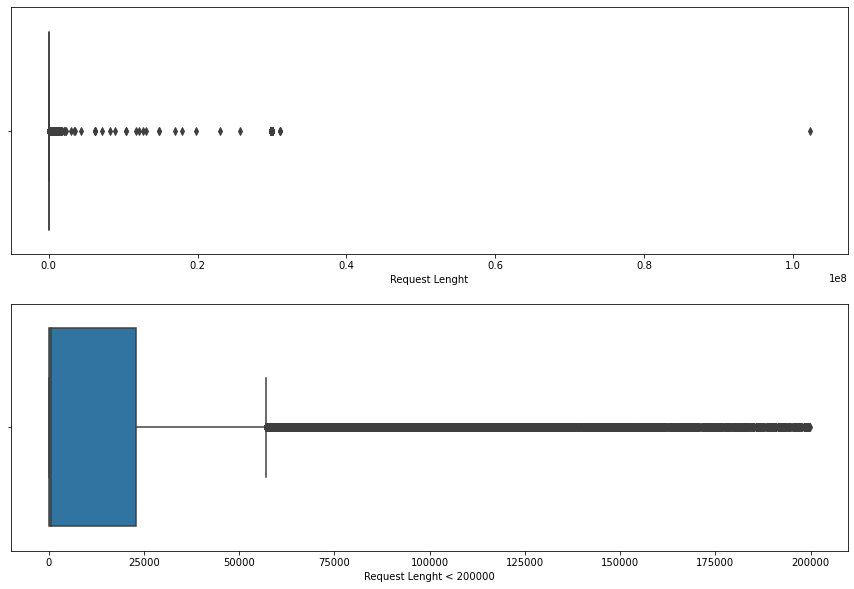

In [81]:
f, axes = plt.subplots(2, figsize=(15,10))
x = sns.boxplot(x=df.request_length, ax=axes[0])
limited_x = sns.boxplot(x=df.request_length[df.request_length < 200000], ax=axes[1])
x.set(xlabel='Request Lenght')
_ = limited_x.set(xlabel='Request Lenght < 200000')

### Request time

In [ ]:
df.request_time.describe()

count    1.240227e+06
mean     6.819186e+03
std      1.845683e+05
min      0.000000e+00
25%      4.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      1.750470e+08
Name: request_time, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


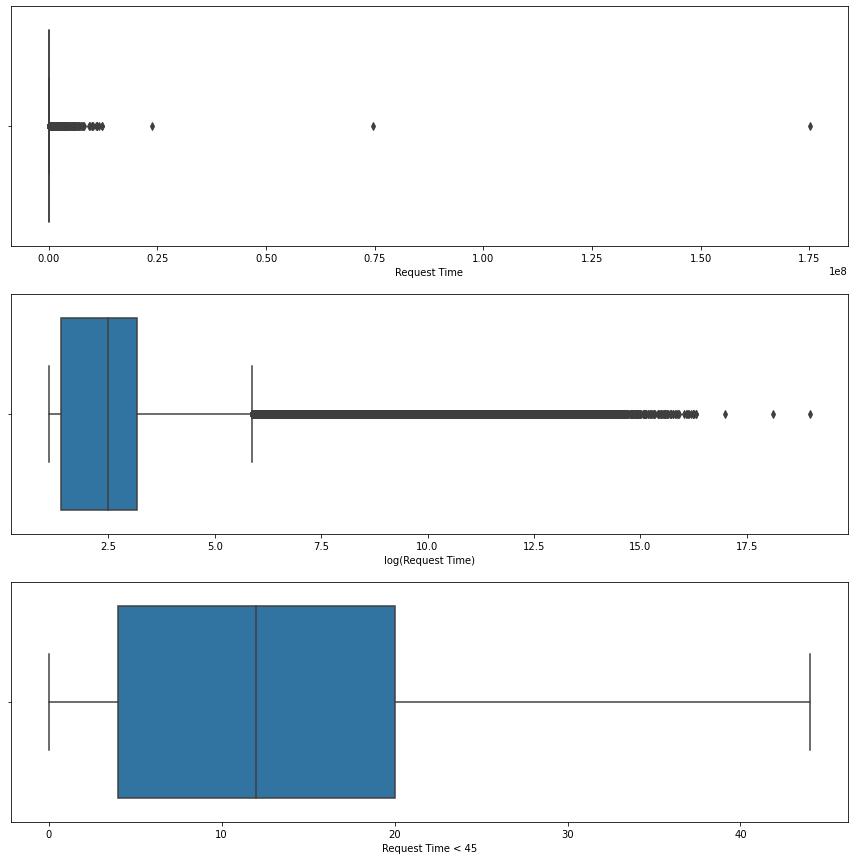

In [89]:
f, axes = plt.subplots(3, figsize=(15,15))
x = sns.boxplot(x=df.request_time, ax=axes[0])
log_x = sns.boxplot(x=np.log(df.request_time), ax=axes[1])
limited_x = sns.boxplot(x=df.request_time[df.request_time < 45], ax=axes[2])
x.set(xlabel='Request Time')
log_x.set(xlabel='log(Request Time)')
_ = limited_x.set(xlabel='Request Time < 45')

### Http Method

In [92]:
method_count = df.http_method.value_counts()
method_count.values

array([1122012,   65447,   32436,   20195,     137])

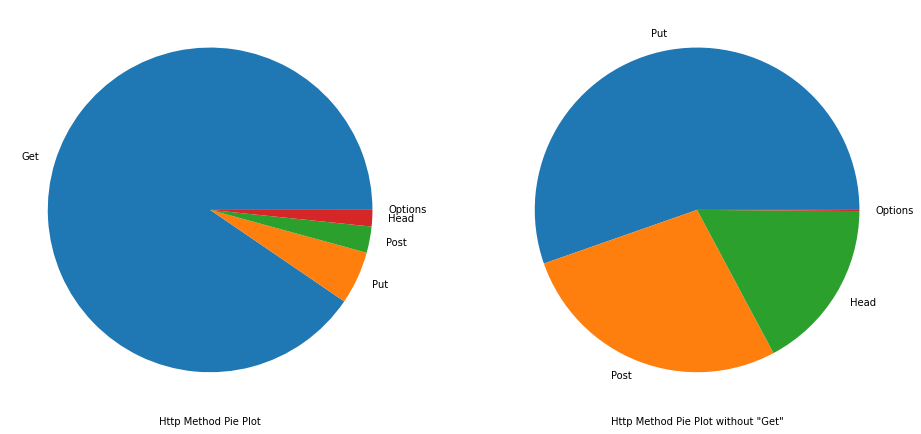

In [91]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].pie(df.http_method.value_counts().values, 
          labels=df.http_method.value_counts().index.values)
axs[1].pie(df.http_method[df.http_method != 'Get'].value_counts().values, 
          labels=df.http_method[df.http_method != 'Get'].value_counts().index.values)
axs[0].set(xlabel='Http Method Pie Plot')
_ = axs[1].set(xlabel='Http Method Pie Plot without "Get"')

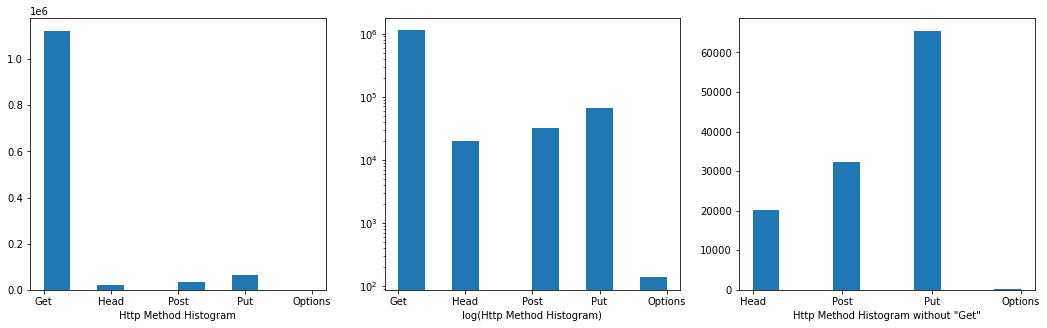

In [90]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].hist(df.http_method)
axs[1].hist(df.http_method, log=True)
axs[2].hist(df.http_method[df.http_method != 'Get'])
axs[0].set(xlabel='Http Method Histogram')
axs[1].set(xlabel='log(Http Method Histogram)')
_ = axs[2].set(xlabel='Http Method Histogram without "Get"')

# Preprocess

In [94]:
df.head()

datetime  \
0 2021-05-12 05:06:00+04:30   
1 2021-05-12 05:06:00+04:30   
2 2021-05-12 05:06:00+04:30   
3 2021-05-12 05:06:00+04:30   
4 2021-05-12 05:06:00+04:30   

                                     http_user_agent               ip  \
0                              [Googlebot-Image/1.0]  207.213.193.143   
1                              [Googlebot-Image/1.0]  207.213.193.143   
2  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   
3  [[Linux, Android 6.0, CAM-L21], [KHTML, like G...    35.108.208.99   
4  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   

   status_code  request_length  request_time http_method  \
0          304               0            32         Get   
1          304               0             4         Get   
2          200           52567            32         Get   
3          200           23531            20         Get   
4          200            4680             8         Get   

                                url  
0          /cdn/profiles/1026106239  
1                  images/badge.png  
2                  /pages/630180847  
3              images/fav_icon2.ico  
4  images/sanjagh_logo_purpule5.png

In [110]:
encoder = OneHotEncoder()
status_1hot = encoder.fit_transform(df[['status_code']])
method_1hot = encoder.fit_transform(df[['http_method']])
df_cleaned = np.concatenate((
    df.drop(labels=['status_code','http_method'], axis=1), 
    status_1hot.toarray(), 
    method_1hot.toarray()), 
    axis=1)

In [135]:
train = pd.DataFrame(df_cleaned)

In [136]:
train.head()

0   \
0 2021-05-12 05:06:00+04:30   
1 2021-05-12 05:06:00+04:30   
2 2021-05-12 05:06:00+04:30   
3 2021-05-12 05:06:00+04:30   
4 2021-05-12 05:06:00+04:30   

                                                  1                2      3   \
0                              [Googlebot-Image/1.0]  207.213.193.143      0   
1                              [Googlebot-Image/1.0]  207.213.193.143      0   
2  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153  52567   
3  [[Linux, Android 6.0, CAM-L21], [KHTML, like G...    35.108.208.99  23531   
4  [[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...   35.110.222.153   4680   

   4                                 5  6  7  8  9   ... 17 18 19 20 21 22 23  \
0  32          /cdn/profiles/1026106239  0  0  0  0  ...  0  0  0  0  0  1  0   
1   4                  images/badge.png  0  0  0  0  ...  0  0  0  0  0  1  0   
2  32                  /pages/630180847  0  1  0  0  ...  0  0  0  0  0  1  0   
3  20              images/fav_icon2.ico  0  1  0  0  ...  0  0  0  0  0  1  0   
4   8  images/sanjagh_logo_purpule5.png  0  1  0  0  ...  0  0  0  0  0  1  0   

  24 25 26  
0  0  0  0  
1  0  0  0  
2  0  0  0  
3  0  0  0  
4  0  0  0  

[5 rows x 27 columns]

In [137]:
train.drop(columns=[0,1,2,5], inplace=True)

In [138]:
train.head()

3   4  6  7  8  9  10 11 12 13  ... 17 18 19 20 21 22 23 24 25 26
0      0  32  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  1  0  0  0  0
1      0   4  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  1  0  0  0  0
2  52567  32  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  0  0  0
3  23531  20  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  0  0  0
4   4680   8  0  1  0  0  0  0  0  0  ...  0  0  0  0  0  1  0  0  0  0

[5 rows x 23 columns]

In [160]:
train_normalized = MinMaxScaler().fit_transform(train)

In [161]:
pd.DataFrame(train_normalized)

0             1    2    3    4    5    6    7    8    9   ...  \
0        0.000000  1.828080e-07  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
1        0.000000  2.285100e-08  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
2        0.000514  1.828080e-07  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3        0.000230  1.142550e-07  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4        0.000046  4.570200e-08  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...           ...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1240222  0.000000  2.285100e-08  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
1240223  0.000000  2.285100e-08  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
1240224  0.000000  3.427821e-04  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1240225  0.000000  1.142550e-07  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   
1240226  0.000000  2.513610e-07  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   

          13   14   15   16   17   18   19   20   21   22  
0        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1240222  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1240223  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1240224  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1240225  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1240226  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

[1240227 rows x 23 columns]

In [16]:
from pycaret.datasets import get_data
anomaly = get_data('anomaly')

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754

In [20]:
anomaly.shape

(1000, 10)

In [18]:
from pycaret.anomaly import *
exp_name = setup(data = anomaly)

In [14]:
import sys
!{sys.executable} -m pip install pycaret

  Using cached pycaret-2.3.1-py3-none-any.whl (261 kB)
     |████████████████████████████████| 24.2 MB 298 kB/s eta 0:00:01
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached mlflow-1.18.0-py3-none-any.whl (14.2 MB)
  Using cached umap-learn-0.5.1.tar.gz (80 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
     |████████████████████████████████| 10.3 MB 189 kB/s eta 0:00:01
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Using cached pyod-0.8.9.tar.gz (104 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached wordcloud-1.8.1.tar.gz (220 kB)
     |████████████████████████████████| 15.6 MB 549 kB/s eta 0:00:01
  Using cached pandas_profiling-3.0.0-py2.py3-

  Using cached phik-0.11.2.tar.gz (1.1 MB)
  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached visions-0.7.1-py3-none-any.whl (102 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 2.6 MB 2.7 MB/s eta 0:00:01
  Using cached tenacity-7.0.0-py2.py3-none-any.whl (23 kB)
  Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
  Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached websocket_client-1.1.0-py2.py3-none-any.whl (68 kB)
  Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
  Using cached multimethod-1.4-py2.py3-none-any.whl (7.3 kB)
  Using cached ImageHash-4.2.0-py2.py3-none-any.whl (295 kB)
  Using cached smmap-4.0.0-py2.py3-none-any.whl (24 kB)


  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=ea33c6e07657d0c6e105c86fd9cdbe93c5e443c0efadee685871afc07fe315d5
  Stored in directory: /Users/arman/Library/Caches/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=552d48c3e5401e1037d33722e5b44886864f1fd64287db035ae92f89d4661ce2
  Stored in directory: /Users/arman/Library/Caches/pip/wheels/95/85/b7/b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=300f29e0808767e0d64160922b781467058c65b7c13dadfcd55886e0158a3651
  Stored in directory: /Users/arman/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for pyod: filename=pyod-0.8.9-py3-none-any.whl size=121412 sha256=c674e49bbdf1bb67031b9c6dfd6cd1db565b4574e13d7dffedb92670adb71c27
  Stored in d